In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = clinical_data_df.merge(mouse_data_df, on='Mouse ID')

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_df = combined_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df = mean_tumor_volume_df.reset_index()

# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume_df = combined_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumor_volume_df = sem_tumor_volume_df.reset_index()

# Preview DataFrame
sem_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_mean_tumor_volume_df = mean_tumor_volume_df.pivot(index='Timepoint', values='Tumor Volume (mm3)', columns='Drug')
pivoted_sem_tumor_volume_df = sem_tumor_volume_df.pivot(index='Timepoint', values='Tumor Volume (mm3)', columns='Drug')

# Preview that Reformatting worked
pivoted_mean_tumor_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
# Common data elements which will be used in all activities
styles = ['o-', '^-', 's-', 'd-']
drugs_of_interest = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


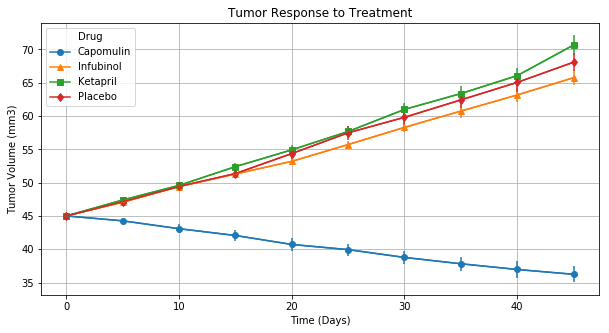

In [7]:
# Generate the Plot (with Error Bars)
ax = pivoted_mean_tumor_volume_df.plot(figsize=(10,5), y=drugs_of_interest, legend = False,
                                       yerr = pivoted_sem_tumor_volume_df[drugs_of_interest])

# NOTE: This is a work around to make markers showup. Ideally we should be able to pass styles to the above statement.
# Some behavior in matplotlib causes the markers to disappear when used with errorbars
ax.set_prop_cycle(None)
pivoted_mean_tumor_volume_df.plot(kind='line', grid=True, y=drugs_of_interest, style=styles, ax=ax)

# Set Chart Properties
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Save the Figure
plt.savefig('output/tumor_response.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites_df = combined_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
mean_met_sites_df = mean_met_sites_df.reset_index()

# Preview DataFrame
mean_met_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_sites_df = combined_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
sem_met_sites_df = sem_met_sites_df.reset_index()

# Preview DataFrame
sem_met_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_mean_met_sites_df = mean_met_sites_df.pivot(index='Timepoint', values='Metastatic Sites', columns='Drug')
pivoted_sem_met_sites_df = sem_met_sites_df.pivot(index='Timepoint', values='Metastatic Sites', columns='Drug')

# Preview that Reformatting worked
pivoted_mean_met_sites_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


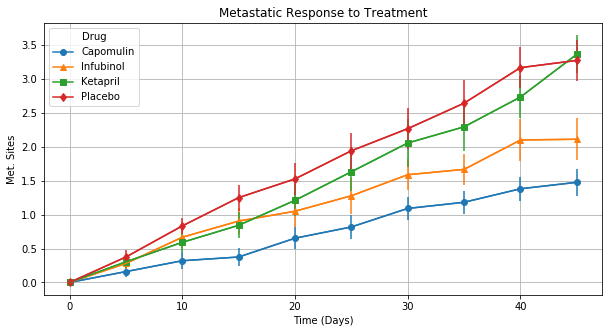

In [11]:
# Generate the Plot (with Error Bars)
ax = pivoted_mean_met_sites_df.plot(figsize=(10,5), y=drugs_of_interest, legend = False,
                                       yerr = pivoted_sem_met_sites_df[drugs_of_interest])

# NOTE: This is a work around to make markers showup. Ideally we should be able to pass styles to the above statement.
# Some behavior in matplotlib causes the markers to disappear when used with errorbars
ax.set_prop_cycle(None)
pivoted_mean_met_sites_df.plot(kind='line', grid=True, y=drugs_of_interest, style=styles, ax=ax)

# Set Chart Properties
plt.title('Metastatic Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Met. Sites')

# Save the Figure
plt.savefig('output/metastatic_response.png')

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_df = combined_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
mice_count_df = mice_count_df.reset_index()
mice_count_df = mice_count_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_mice_count_df = mice_count_df.pivot(index='Timepoint', values='Mouse Count', columns='Drug')

# Preview that Reformatting worked
pivoted_mice_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


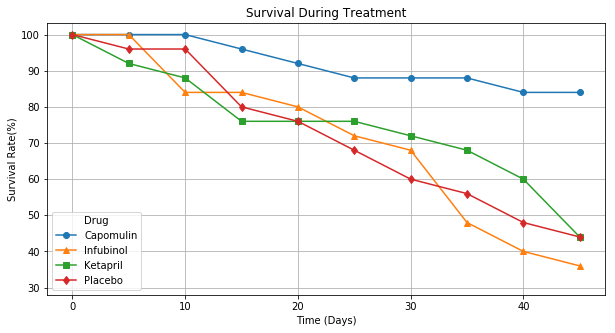

In [14]:
# Generate the Plot (Accounting for percentages)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

pivoted_mice_count_df.plot(kind='line', grid=True, y=drugs_of_interest,
                           title='Survival During Treatment', style=styles, ax=ax)

# Set Chart Properties
plt.xlabel('Time (Days)') 
plt.ylabel('Survival Rate(%)')
min_val = pivoted_mice_count_df[drugs_of_interest].min().min()
max_val = pivoted_mice_count_df[drugs_of_interest].max().max()
plt.ylim(min_val-2, max_val+0.8)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=max_val, symbol=None))

# Save the Figure
plt.savefig('output/survival.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
num_rows = len(pivoted_mean_tumor_volume_df)
pct_change_series = pivoted_mean_tumor_volume_df.pct_change(num_rows-1).iloc[num_rows-1:].transpose().iloc[:,0]*100

# Display the data to confirm
pct_change_series

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

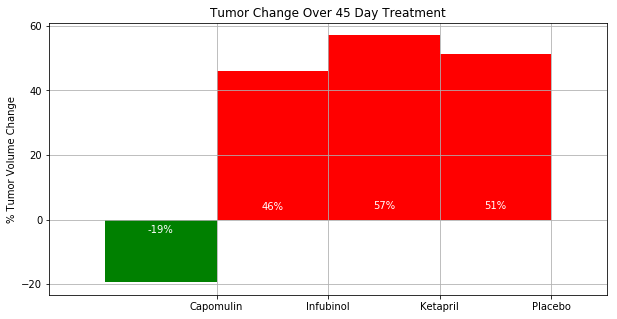

In [16]:
# Store all Relevant Percent Changes into a Tuple
changes = pct_change_series[drugs_of_interest]

# Calculate Colors and Widths
colors = ['red' if change >= 0 else 'green' for change in changes]
width=0.25
max_x = len(drugs_of_interest)*width+width

# Create Bar Chart
fig, ax = plt.subplots(figsize=(10,5))
xaxis=[ ii*width for ii in np.arange(1,max_x/width)]
xtickpos=[ (ii*width)+width/2 for ii in np.arange(1,max_x/width)]
bars = ax.bar(xaxis, changes, width=width, color=colors)

# Set Chart Properties
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')
plt.xlim(0, max_x)
plt.yticks(np.arange((min(changes)//20)*20, (max(changes)//20+2)*20, step=20))
plt.grid(True)
plt.xticks(xtickpos, drugs_of_interest)

# Decorate Bars With Percentages
for bar in bars:
    height = bar.get_height()
    pos = 0.25*height if height < 0 else 0.05*height
    ax.text(bar.get_x() + bar.get_width()/2, pos, '%d%%' % int(height), color='w', ha='center', va='bottom')

# Save the Figure
plt.savefig('output/tumorchange.png')

# Show the Figure
fig.show()